<a href="https://colab.research.google.com/github/plthiyagu/AI-Engineering/blob/master/10-TimeSeries/Granger_Causality_in_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.analyticsvidhya.com/blog/2021/08/granger-causality-in-time-series-explained-using-chicken-and-egg-problem/?utm_source=feedburner&utm_medium=email&utm_campaign=Feed%3A+AnalyticsVidhya+%28Analytics+Vidhya%29

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/plthiyagu/Personnel/master/Dataset/chickeggs.csv')

In [3]:
df.head()

,year,chic,egg
0,1930,468491,3581
1,1931,449743,3532
2,1932,436815,3327
3,1933,444523,3255
4,1934,433937,3156


In [4]:
df.dtypes

year    int64
chic    int64
egg     int64
dtype: object

In [5]:
df.shape

(75, 3)

In [6]:
df.describe()

,year,chic,egg
count,75.000000,75.000000,75.000000
mean,1967.000000,412995.786667,5361.120000
std,21.794495,44353.556157,1016.461044
min,1930.000000,353179.000000,3081.000000
25%,1948.500000,381131.000000,5230.500000
50%,1967.000000,398156.000000,5474.000000
75%,1985.500000,434312.000000,5794.500000
max,2004.000000,582197.000000,7428.000000


Check if the data is stationary, if not make it stationary to proceed.



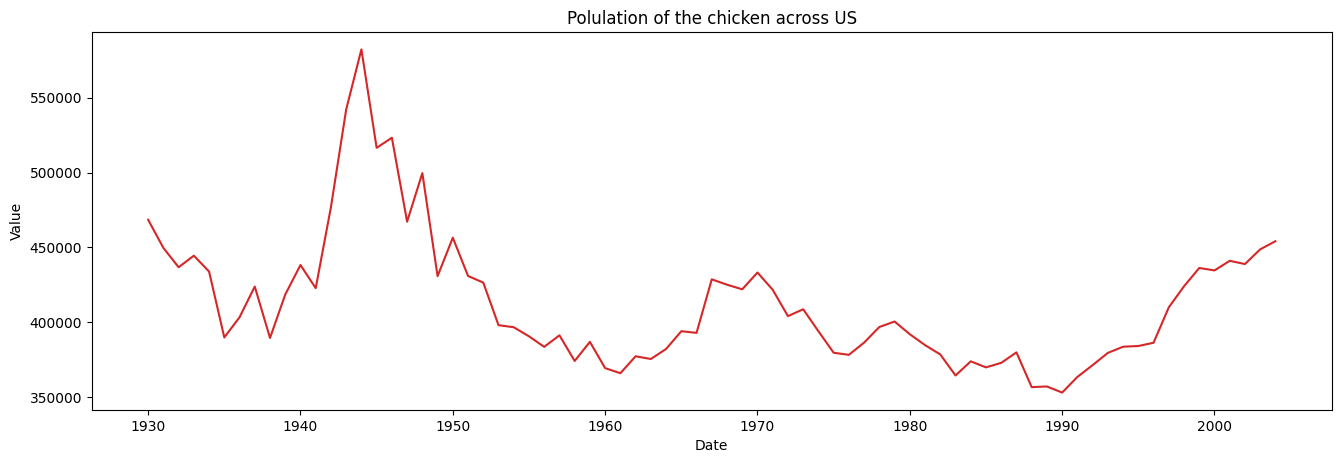

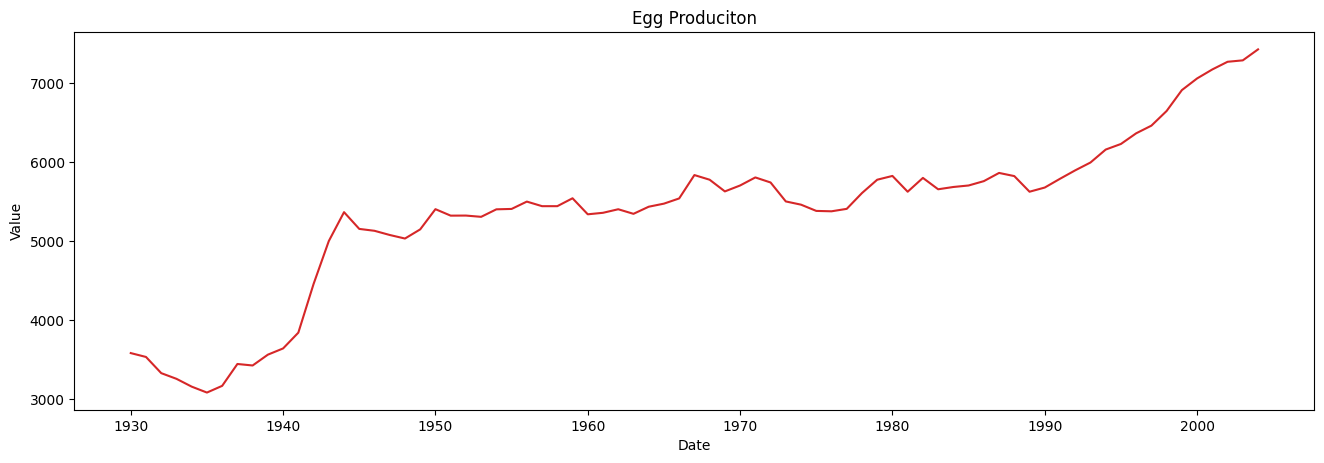

In [9]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
plot_df(df, x=df.year, y=df.chic, title='Polulation of the chicken across US')   
plot_df(df, x=df.year, y=df.egg, title='Egg Produciton')


In [10]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['chic'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Test Statistics: -2.6729225604916143
p-value: 0.07884218974748775
critical_values: {'1%': -3.5274258688046647, '5%': -2.903810816326531, '10%': -2.5893204081632653}


In [11]:
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Series is not stationary


In [12]:
result = adfuller(df['egg'])

In [13]:
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: -0.8089825412044827
p-value: 0.8164692637014495
critical_values: {'1%': -3.5232835753964475, '5%': -2.902030597326081, '10%': -2.5883710883843123}
Series is not stationary


In [14]:
df_transformed = df.diff().dropna()
df = df.iloc[1:]
print(df.shape)
df_transformed.shape

(74, 3)


(74, 3)

In [15]:
df_transformed.head()

,year,chic,egg
1,1.0,-18748.0,-49.0
2,1.0,-12928.0,-205.0
3,1.0,7708.0,-72.0
4,1.0,-10586.0,-99.0
5,1.0,-43979.0,-75.0


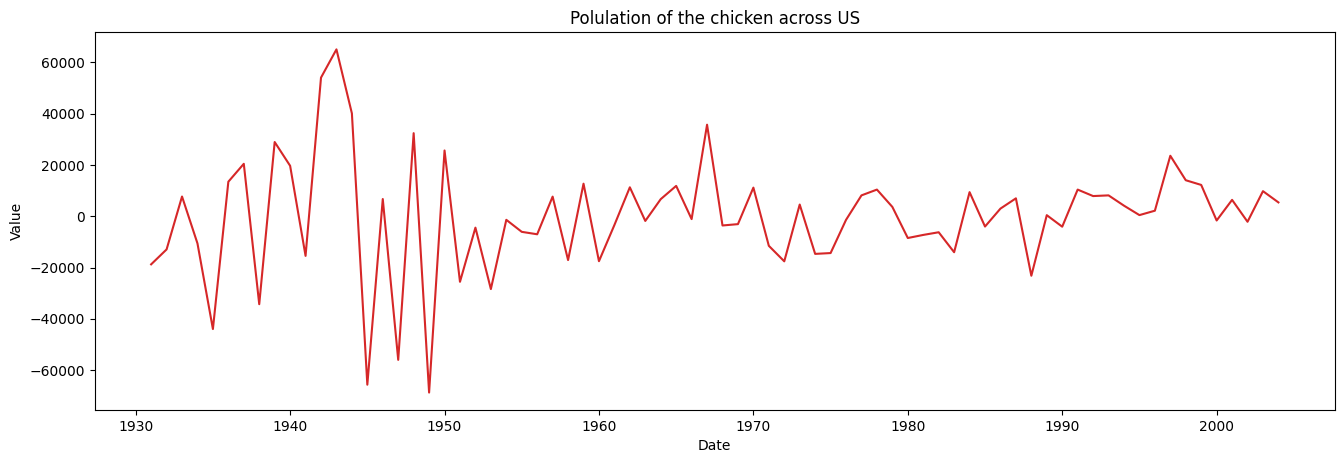

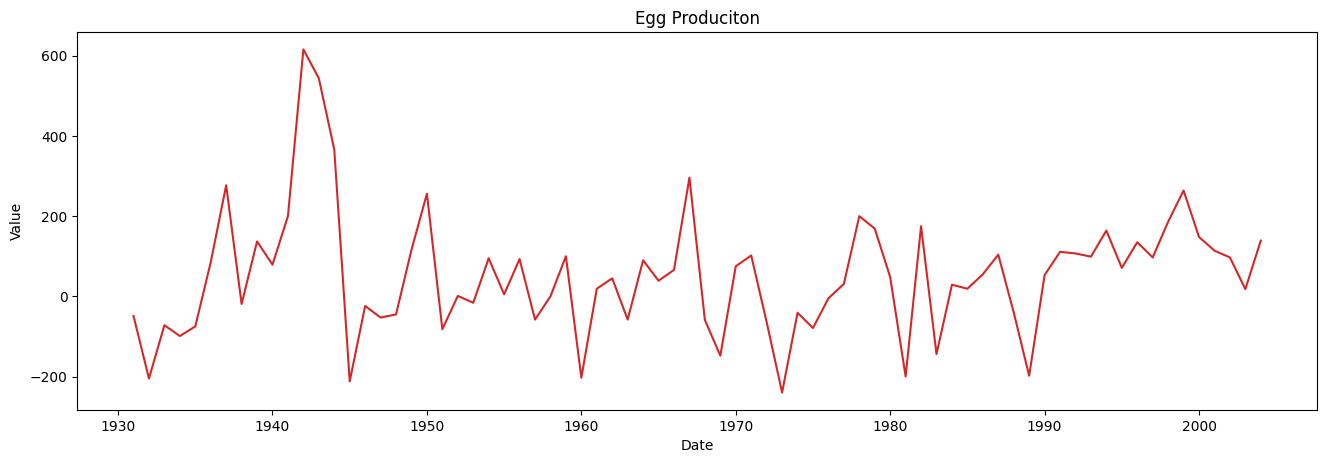

In [17]:
plot_df(df_transformed, x=df.year, y=df_transformed.chic, title='Polulation of the chicken across US')   
plot_df(df_transformed, x=df.year, y=df_transformed.egg, title='Egg Produciton')


In [18]:
result = adfuller(df_transformed['chic'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")


Test Statistics: -4.479349177399477
p-value: 0.0002142433392309962
critical_values: {'1%': -3.526004646825607, '5%': -2.9032002348069774, '10%': -2.5889948363419957}
Series is stationary


In [19]:
result = adfuller(df_transformed['egg'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: -5.638207341963326
p-value: 1.0511328260645514e-06
critical_values: {'1%': -3.5232835753964475, '5%': -2.902030597326081, '10%': -2.5883710883843123}
Series is stationary


In [20]:
from statsmodels.tsa.stattools import grangercausalitytests

In [22]:
grangercausalitytests(df_transformed[['chic', 'egg']], maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=12.3794 , p=0.0008  , df_denom=70, df_num=1
ssr based chi2 test:   chi2=12.9100 , p=0.0003  , df=1
likelihood ratio test: chi2=11.8873 , p=0.0006  , df=1
parameter F test:         F=12.3794 , p=0.0008  , df_denom=70, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.4242  , p=0.0157  , df_denom=67, df_num=2
ssr based chi2 test:   chi2=9.5088  , p=0.0086  , df=2
likelihood ratio test: chi2=8.9313  , p=0.0115  , df=2
parameter F test:         F=4.4242  , p=0.0157  , df_denom=67, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.3643  , p=0.0239  , df_denom=64, df_num=3
ssr based chi2 test:   chi2=11.1969 , p=0.0107  , df=3
likelihood ratio test: chi2=10.3971 , p=0.0155  , df=3
parameter F test:         F=3.3643  , p=0.0239  , df_denom=64, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.1605  , p=0.0048  , df_d

{1: ({'lrtest': (11.887338144896603, 0.0005651683316143055, 1),
   'params_ftest': (12.379406998078235, 0.0007672650888977825, 70.0, 1.0),
   'ssr_chi2test': (12.909953012281594, 0.00032683949784864186, 1),
   'ssr_ftest': (12.379406998078242, 0.0007672650888977825, 70.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (8.931259224442329, 0.011497454542757895, 2),
   'params_ftest': (4.424248356801144, 0.015677692377292454, 67.0, 2.0),
   'ssr_chi2test': (9.508832289243857, 0.008613572305949568, 2),
   'ssr_ftest': (4.424248356800962, 0.01567769237729503, 67.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (10.39708342002018, 0.01547554081582761, 3),
   'params_ftest': (3.3643288162454925, 0.023936029805464172, 64.0, 3.0),
   'ssr_chi2test': (11.196906841567046, 0.010707411013706276, 3),
   'ssr_ftest': (3.364328816245497, 0.023936029805464117, 64.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
        

In [23]:
grangercausalitytests(df_transformed[['egg', 'chic']], maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1207  , p=0.7294  , df_denom=70, df_num=1
ssr based chi2 test:   chi2=0.1258  , p=0.7228  , df=1
likelihood ratio test: chi2=0.1257  , p=0.7229  , df=1
parameter F test:         F=0.1207  , p=0.7294  , df_denom=70, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2472  , p=0.7817  , df_denom=67, df_num=2
ssr based chi2 test:   chi2=0.5313  , p=0.7667  , df=2
likelihood ratio test: chi2=0.5293  , p=0.7675  , df=2
parameter F test:         F=0.2472  , p=0.7817  , df_denom=67, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1461  , p=0.9318  , df_denom=64, df_num=3
ssr based chi2 test:   chi2=0.4861  , p=0.9219  , df=3
likelihood ratio test: chi2=0.4845  , p=0.9223  , df=3
parameter F test:         F=0.1461  , p=0.9318  , df_denom=64, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.1995  , p=0.9377  , df_d

{1: ({'lrtest': (0.12573222254854954, 0.7228987187081055, 1),
   'params_ftest': (0.12066903278912226, 0.729352286787526, 70.0, 1.0),
   'ssr_chi2test': (0.12584056276575306, 0.7227842810980323, 1),
   'ssr_ftest': (0.12066903278907827, 0.7293522867875679, 70.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (0.5293448325940062, 0.7674573153112558, 2),
   'params_ftest': (0.2471999824807247, 0.7816936341490762, 67.0, 2.0),
   'ssr_chi2test': (0.5312954847347093, 0.7667091590911916, 2),
   'ssr_ftest': (0.2471999824807328, 0.7816936341490703, 67.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (0.48449135930866305, 0.9222851405149196, 3),
   'params_ftest': (0.14607268871884457, 0.9318370402998889, 64.0, 3.0),
   'ssr_chi2test': (0.48614816714092907, 0.9219238885198406, 3),
   'ssr_ftest': (0.1460726887184012, 0.9318370403001721, 64.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 